In [14]:
#데이터 로드

import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('C:/Users/Owner/Desktop/git/그 외/archive (4)/Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [15]:
#관련 없는 열 삭제 및 데이터셋에 null 값이 있는지 체크

In [16]:
df = df.drop(['Serial No.'], axis=1)
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

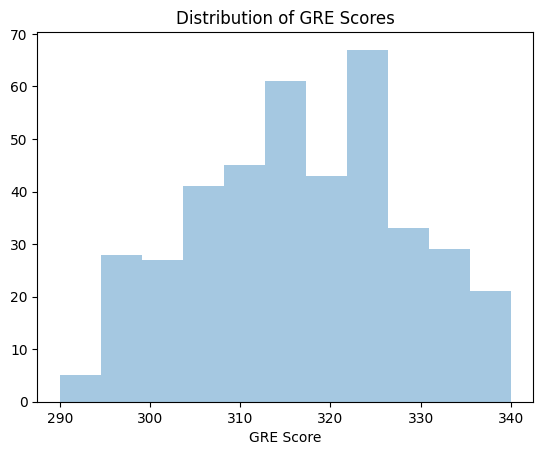

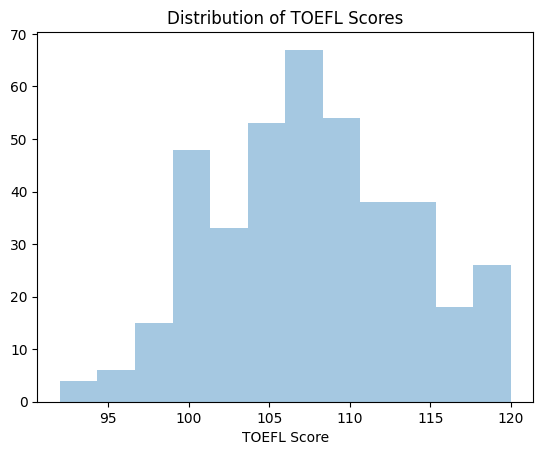

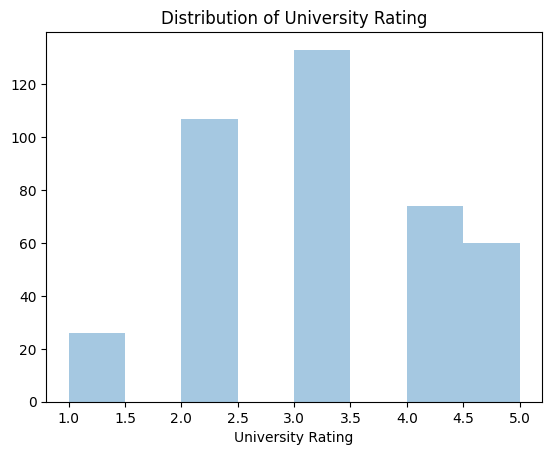

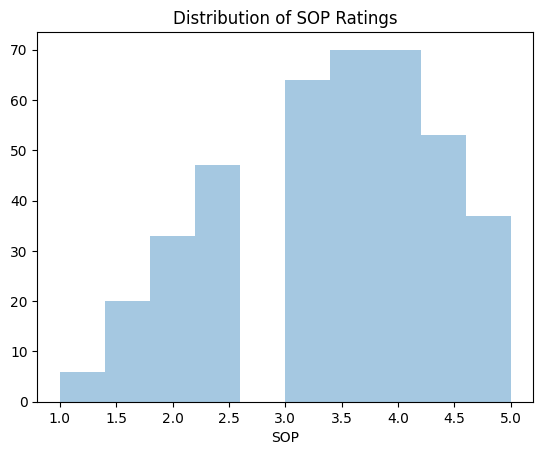

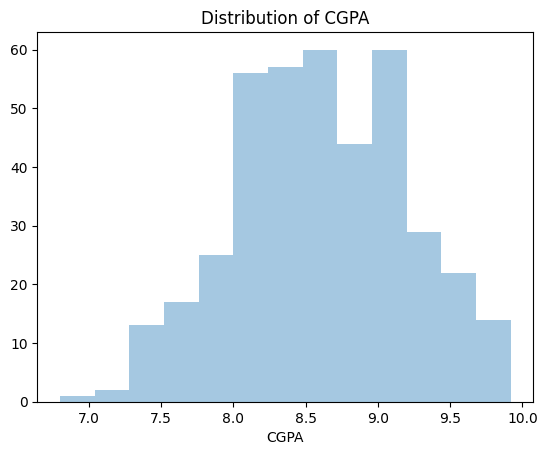

In [19]:
#지원자 변수 분포 확인

import matplotlib.pyplot as plt
import seaborn as sns

fig = sns.distplot(df['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

fig = sns.distplot(df['TOEFL Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()

fig = sns.distplot(df['University Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()

fig = sns.distplot(df['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()

fig = sns.distplot(df['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()

plt.show()

In [20]:
#분포를 보면 다양한 장점을 가진 학생들이 대학원에 지원하는 것을 알 수 있다.

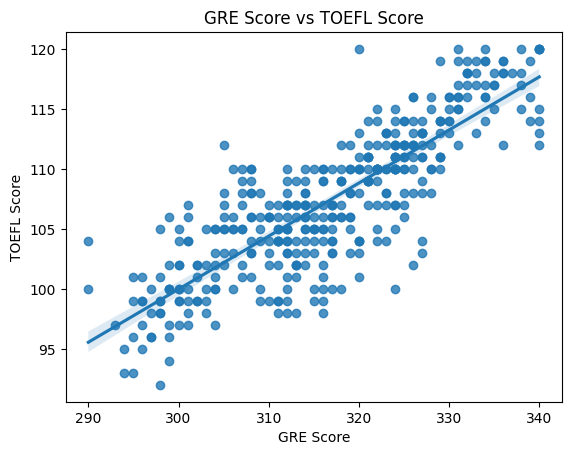

In [21]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=df)

plt.title("GRE Score vs TOEFL Score")
plt.show()

In [22]:
#GRE 점수가 높은 사람들은 또한 더 높은 토플 점수를 보유하고 있는데, 이것은 토플과 GRE 둘 다 유사하진 않지만 언어적인 요소를 가지고 있기 때문에 GRE 점수 혹은 토플 점수 한 쪽이 높다면 한 쪽도 높은 점수를 받을 가능성이 높다.

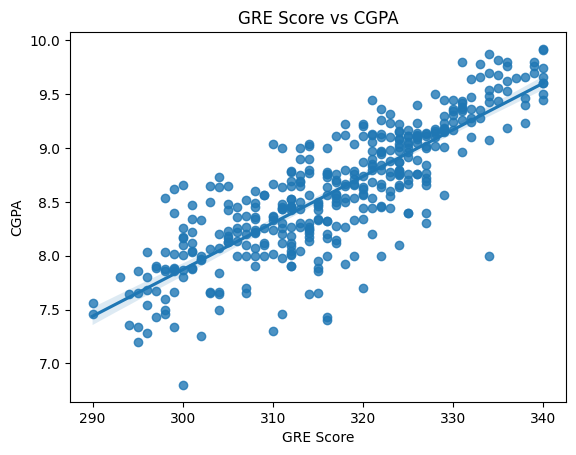

In [23]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=df)

plt.title("GRE Score vs CGPA")
plt.show()

In [24]:
#예외도 있지만, CGPA가 높은 사람들은 보통 똑똑하거나 열심히 공부해서 그런지 GRE 점수가 더 높다.

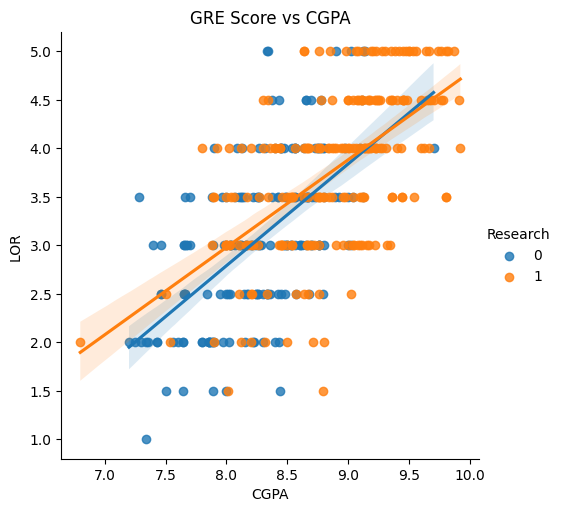

In [25]:
fig = sns.lmplot(x="CGPA", y="LOR ", data=df, hue="Research")

plt.title("GRE Score vs CGPA")
plt.show()

In [26]:
#LOR은 CGPA와 그다지 관련이 없으므로, LOR이 해당 인물의 학업 성취도에 의존하지 않는다는 것은 명백하다. 연구 경험이 있다는 것은 보통 좋은 LOR과 관련이 있으며, 이는 감독자가 연구를 수행하는 학생들과 개인적인 상호작용을 한다는 사실로 정당화될 수 있으며, 이는 보통 좋은 LOR로 귀결된다

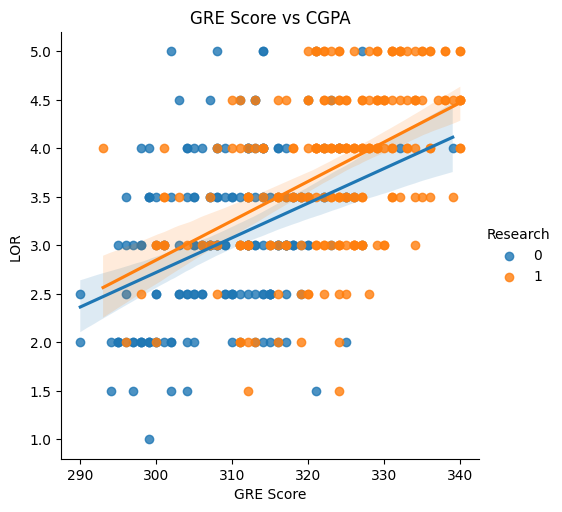

In [27]:
fig = sns.lmplot(x="GRE Score", y="LOR ", data=df, hue="Research")

plt.title("GRE Score vs CGPA")
plt.show()

In [28]:
#GRE 점수와 LOR 점수는 또한 그다지 관련이 없다. 다른 종류의 LOR을 가진 사람들은 모든 종류의 GRE 점수를 가지고 있다.

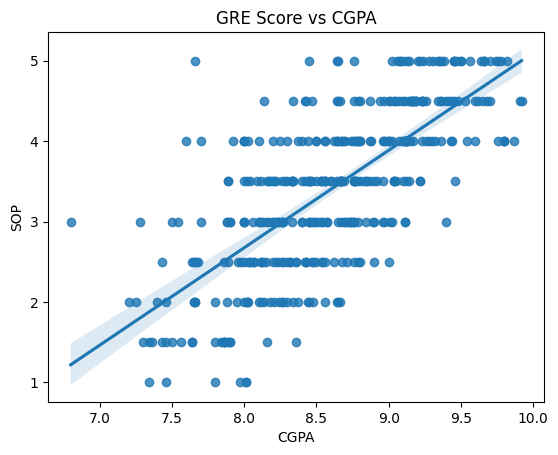

In [29]:
fig = sns.regplot(x="CGPA", y="SOP", data=df)

plt.title("GRE Score vs CGPA")
plt.show()

In [30]:
#CGPA와 SOP는 학업성적과 관련이 있기 때문에 그다지 관련이 없지만, CGPA가 좋은 사람들은 더 열심히 하는 경향이 있기 때문에 좋은 SOP와 CGPA를 모두 좋은 성적을 보유하고 있는 사람들이 존재한다.

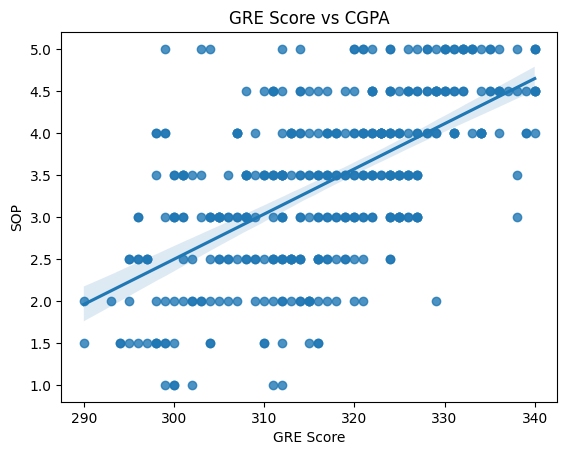

In [31]:
fig = sns.regplot(x="GRE Score", y="SOP", data=df)

plt.title("GRE Score vs CGPA")
plt.show()

In [32]:
#유사한 GRE 점수와 CGPA는 어느정도의 관련성만 있다.

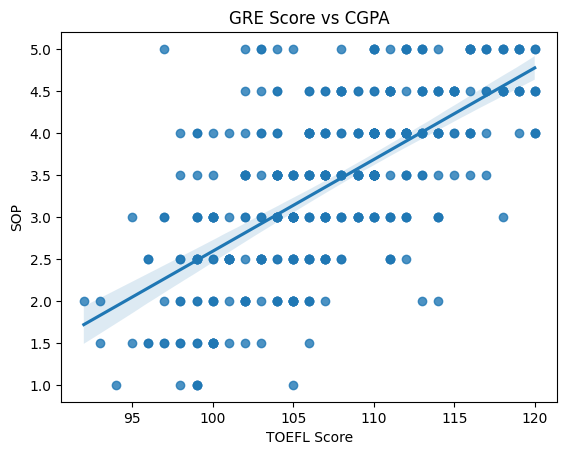

In [33]:
fig = sns.regplot(x="TOEFL Score", y="SOP", data=df)

plt.title("GRE Score vs CGPA")
plt.show()

In [34]:
#다양한 SOP를 보유한 지원자들은 다양한 종류의 토플 점수를 가지고 있다. 그래서 SOP의 질이 지원자들의 영어 실력과 항상 관련이 있는 것은 아니다.

In [35]:
#변수간 상관관계 확인

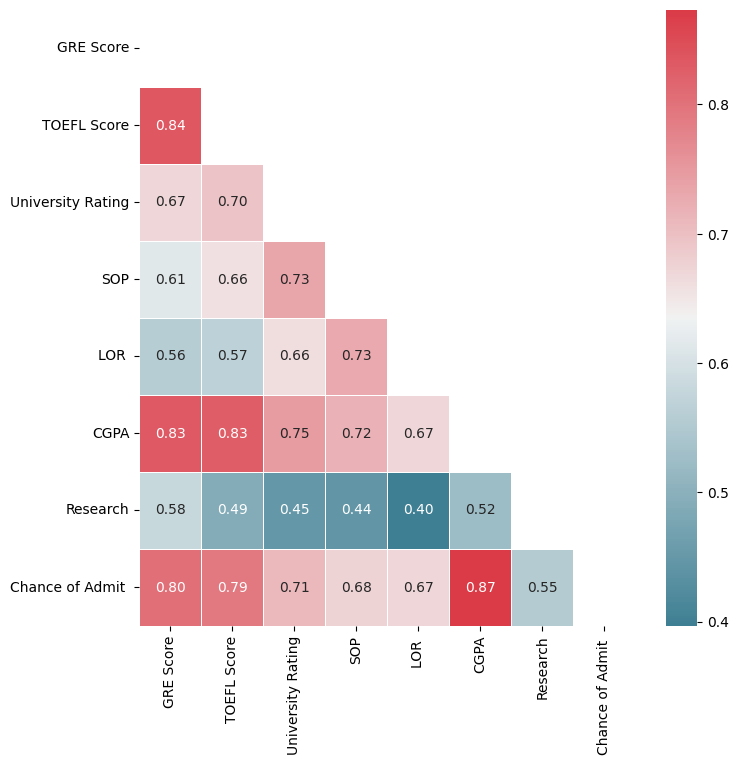

In [36]:
import numpy as np
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [37]:
#교육 및 테스트 세트로 데이터셋을 분할하고 입력 및 출력

In [38]:
from sklearn.model_selection import train_test_split

X = df.drop(['Chance of Admit '], axis=1)
y = df['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, shuffle=False)

In [39]:
#다양한 알고리즘을 사용하여 어떤 모델이 더 나은 성능을 갖는지 알아보겠다.

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error

models = [['DecisionTree :',DecisionTreeRegressor()],
           ['Linear Regression :', LinearRegression()],
           ['RandomForest :',RandomForestRegressor()],
           ['KNeighbours :', KNeighborsRegressor(n_neighbors = 2)],
           ['SVM :', SVR()],
           ['AdaBoostClassifier :', AdaBoostRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()],
           ['Xgboost: ', XGBRegressor()],
           ['CatBoost: ', CatBoostRegressor(logging_level='Silent')],
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['BayesianRidge: ', BayesianRidge()],
           ['ElasticNet: ', ElasticNet()],
           ['HuberRegressor: ', HuberRegressor()]]

print("Results...")


for name,model in models:
    model = model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

Results...
DecisionTree : 0.09293142633146229
Linear Regression : 0.06473311695782076
RandomForest : 0.06977438014773042
KNeighbours : 0.083342291185208
SVM : 0.08180727044650482
AdaBoostClassifier : 0.07969260298564144
GradientBoostingClassifier:  0.06649564514437414
Xgboost:  0.0751365063590514
CatBoost:  0.0721662277930756
Lasso:  0.13137657075960432
Ridge:  0.06479970981992433
BayesianRidge:  0.06489639576721211
ElasticNet:  0.0980598738822262
HuberRegressor:  0.0688492948627345


In [46]:
#!pip install xgboost
#!pip install catboost

In [47]:
#이 경우 선형 회귀 분석과 같이 단순한 것이 가장 좋은 성능을 발휘하며, 이는 복잡한 모형이 항상 더 나은 결과를 의미하는 것은 아니라는 것을 증명한다. 단순한 모형이 훨씬 더 적합한 경우도 있다.
#Lasso Regresson:  0.13137657075960432

In [48]:
classifier = RandomForestRegressor()
classifier.fit(X,y)
feature_names = X.columns
importance_frame = pd.DataFrame()
importance_frame['Features'] = X.columns
importance_frame['Importance'] = classifier.feature_importances_
importance_frame = importance_frame.sort_values(by=['Importance'], ascending=True)

In [49]:
#시각화

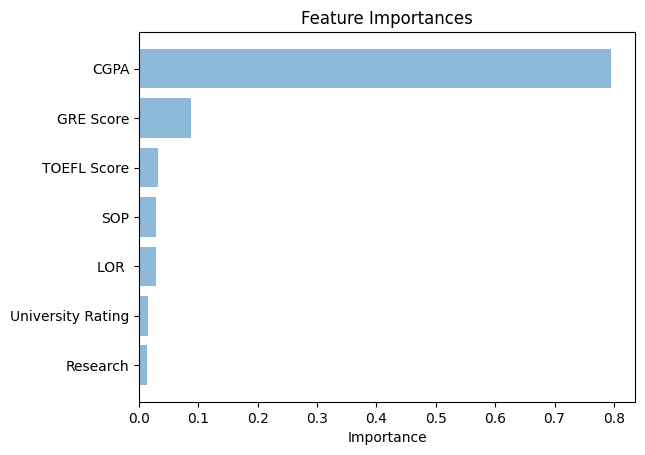

In [50]:
plt.barh([1,2,3,4,5,6,7], importance_frame['Importance'], align='center', alpha=0.5)
plt.yticks([1,2,3,4,5,6,7], importance_frame['Features'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

In [51]:
#대학원 입학에 가장 중요한 요소는 GRE 점수라고 할 수 있다.